In [1]:
import warnings
warnings.filterwarnings('ignore')

import lightkurve as lk

datalist = lk.search_lightcurvefile('KIC10963065', cadence='short')
print(datalist)

SearchResult containing 27 data products.

 target_name            productFilename                        description              distance
------------- ------------------------------------ ------------------------------------ --------
kplr010963065 kplr010963065-2009259162342_slc.fits  Lightcurve Short Cadence (CSC) - Q2      0.0
kplr010963065 kplr010963065-2010111051353_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010140023957_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010174090439_slc.fits  Lightcurve Short Cadence (CSC) - Q5      0.0
kplr010963065 kplr010963065-2010203174610_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010234115140_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010265121752_slc.fits  Lightcurve Short Cadence (CSC) - Q6      0.0
kplr010963065 kplr010963065-2010296114515_slc.fits  Lightcurve Short Cadence (CSC) -

CHeck I can do this offline

In [2]:
data = datalist[1:10].download_all()

In [3]:
lc = data[0].PDCSAP_FLUX.normalize().remove_nans().remove_outliers()
for d in data[1:]:
    lc = lc.append(d.PDCSAP_FLUX.normalize().remove_nans().remove_outliers())

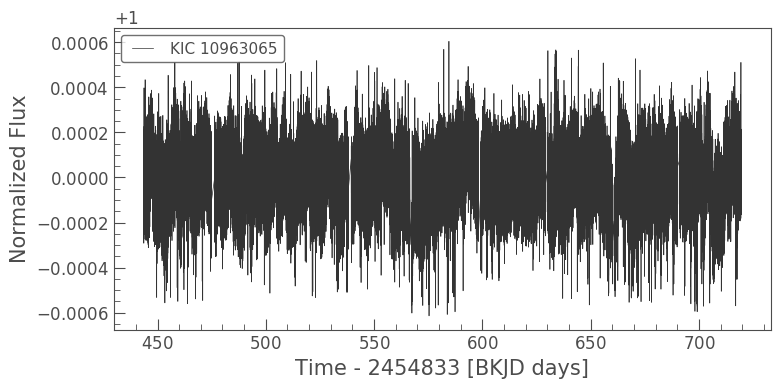

In [4]:
lc.plot()

## Using seismology tools

In [9]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=1000, maximum_frequency=3000)

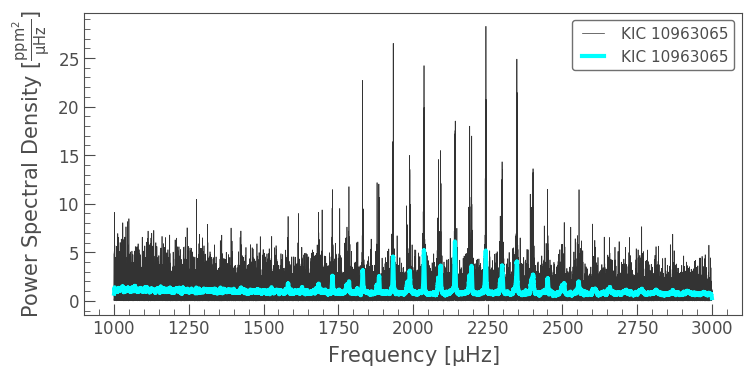

In [12]:
ax = pg.plot()
pg.smooth(filter_width=3).plot(ax=ax, lw=3, c='cyan')

In [13]:
pg.show_properties()

lightkurve.Periodogram properties:
      Attribute         Description     Units   
---------------------- -------------- ----------
                nterms              1           
              targetid       10963065           
          default_view      frequency           
                 label   KIC 10963065           
             ls_method           fast           
frequency_at_max_power      2244.0321        uHz
             max_power        28.2609 ppm2 / uHz
               nyquist      8496.4268        uHz
   period_at_max_power         0.0004    1 / uHz
             frequency array (47707,)        uHz
                period array (47707,)    1 / uHz
                 power array (47707,) ppm2 / uHz
                  meta <class 'dict'>           


In [14]:
pg.frequency_at_max_power

<Quantity 2244.03210954 uHz>

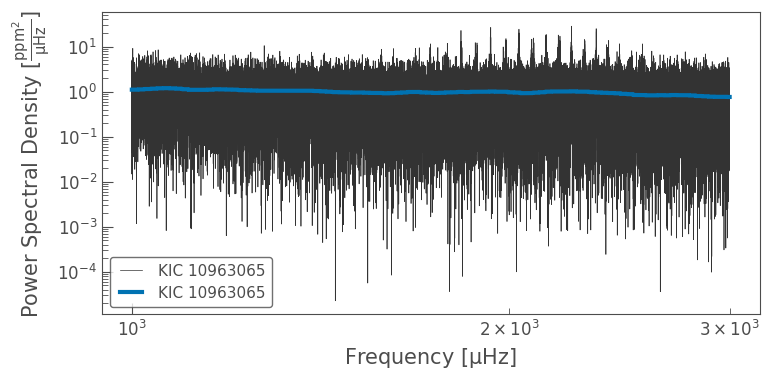

In [51]:
snr, bkg = pg.flatten(return_trend = True)
ax = pg.plot()
bkg.plot(ax=ax, scale='log', lw=3)

In [48]:
bkg

(SNRPeriodogram(ID: 10963065), LombScarglePeriodogram(ID: 10963065))

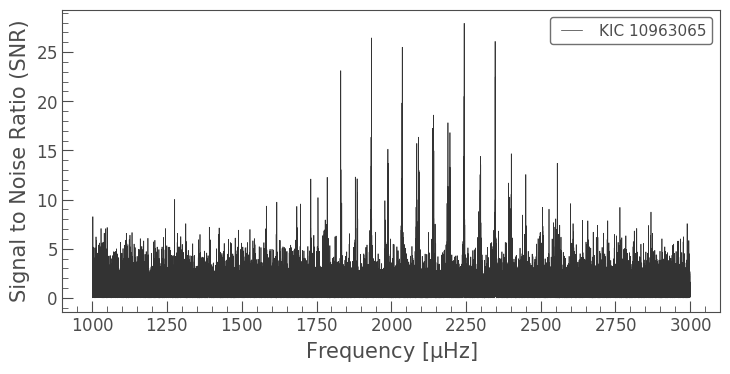

In [16]:
snr.plot()

## seismology

In [17]:
butler = snr.to_seismology()
butler

SeismologyButler(ID: 10963065)

In [19]:
numax = butler.estimate_numax()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13bb3f828>,
      dtype=object)

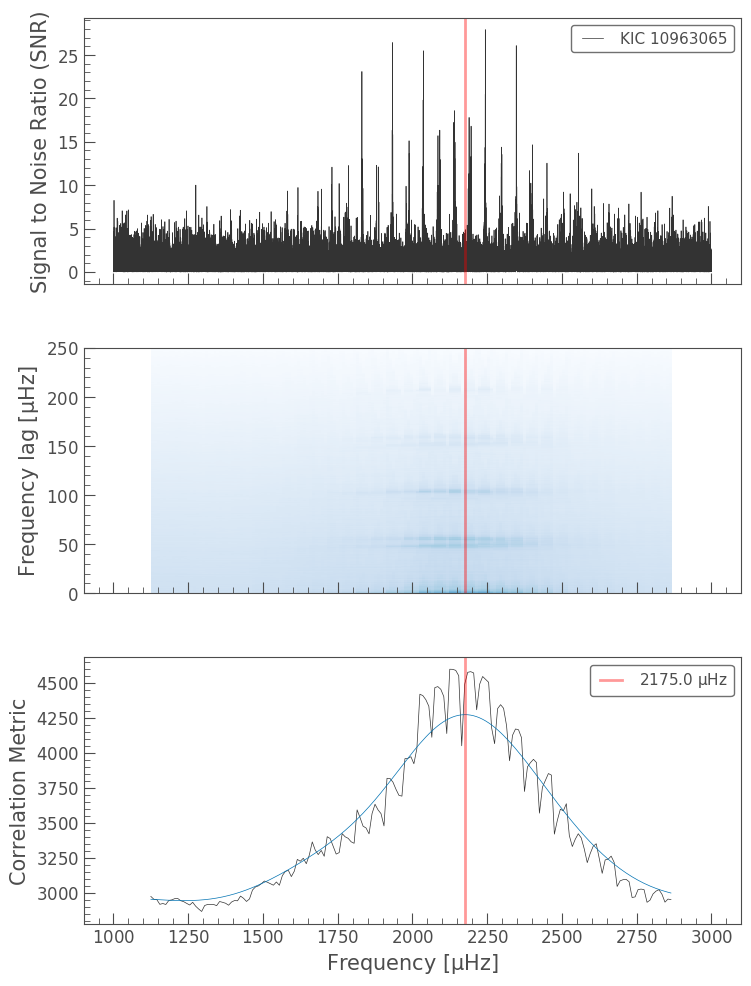

In [21]:
butler.diagnose_numax()

In [22]:
dnu = butler.estimate_deltanu()

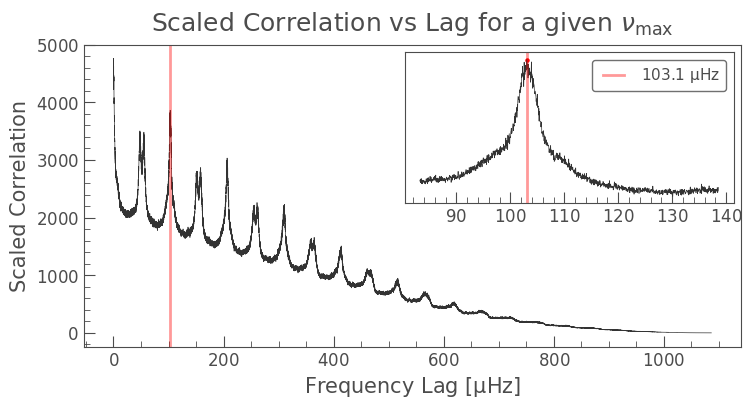

In [23]:
butler.diagnose_deltanu()

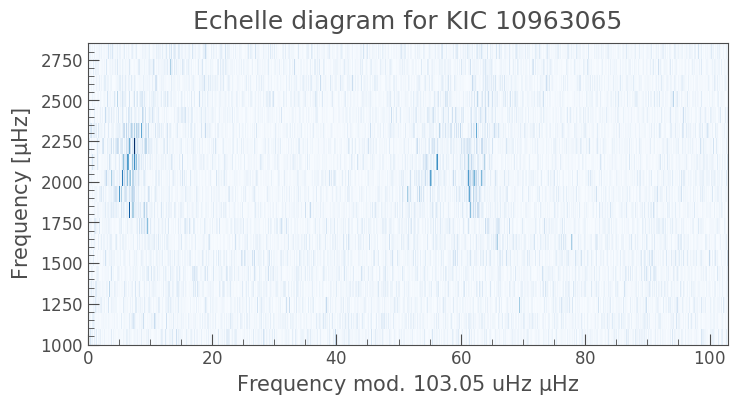

In [24]:
butler.plot_echelle()

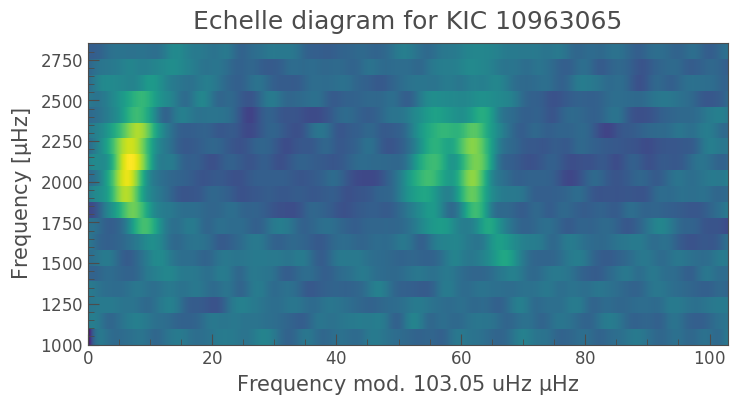

In [35]:
smoothed_butler = butler
smoothed_butler.periodogram = smoothed_butler.periodogram.smooth(filter_width=2)
smoothed_butler.plot_echelle(scale='log', cmap='viridis')

## Estimating stellar parameters

In [26]:
Teff = 6144

In [39]:
butler.estimate_mass(Teff)

<SeismologyQuantity 1.13134354 solMass>

In [45]:
radius = butler.estimate_radius(Teff)
radius

<SeismologyQuantity 1.24814672 solRad>

In [41]:
butler.estimate_logg(Teff)

<SeismologyQuantity 4.29913085 dex>

truncate these

make purpose clearer

In [42]:
print('Radius : {} vs {:.2f} Rsol'.format(1.210, butler.radius.value))
print('Mass : {} vs {:.2f} Msol'.format(1.04, butler.mass.value))
print('logg : {} vs {:.2f} dex'.format(4.29, butler.logg.value))

Radius : 1.21 vs 1.25 Rsol
Mass : 1.04 vs 1.13 Msol
logg : 4.29 vs 4.30 dex
